In [34]:
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(asctime)s: %(message)s')

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.signal as sig

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams.update({'font.size': 16})


Coeffiencts of b = [0.29289322 0.58578644 0.29289322]
Coeffiencts of a =  [ 1.00000000e+00 -1.11022302e-16  1.71572875e-01]


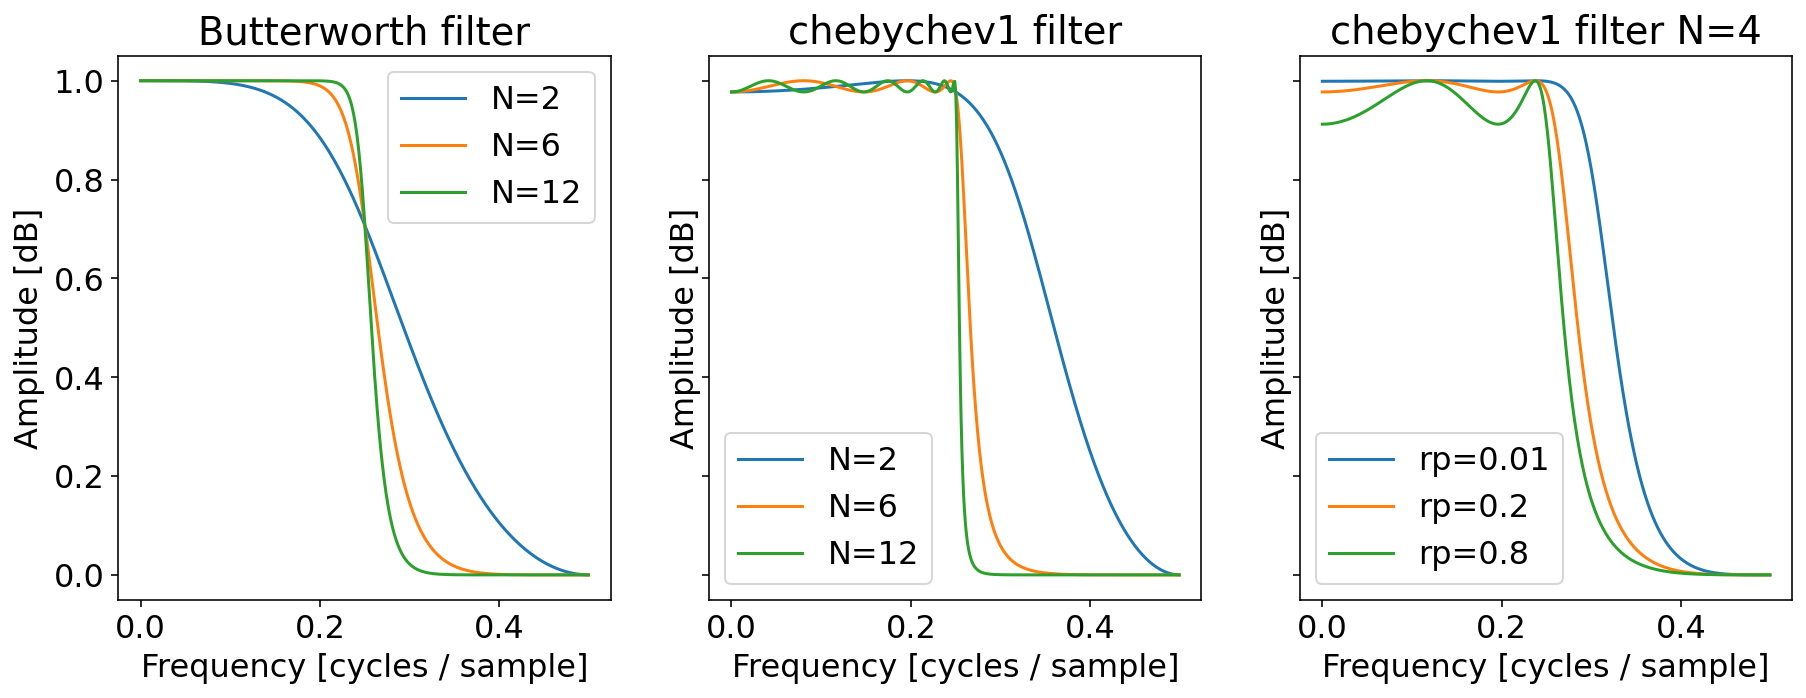

In [48]:
fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(15,5))

bb, ab = sig.butter(2, 0.5, 'low', analog=False, output='ba')
print('Coeffiencts of b =', bb)
print('Coeffiencts of a = ',ab)
wb, hb = sig.freqz(bb, ab)
wb = wb/(2*math.pi)
ax[0].plot(wb, abs(np.array(hb)), label='N=2')
ax[0].set_xlabel('Frequency [cycles / sample]')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].set_title('Butterworth filter')

bb, ab = sig.butter(6, 0.5, 'low', analog=False, output='ba')
wb, hb = sig.freqz(bb, ab)
wb = wb/(2*math.pi)
ax[0].plot(wb, abs(np.array(hb)), label='N=6')

bb, ab = sig.butter(12, 0.5, 'low', analog=False, output='ba')
wb, hb = sig.freqz(bb, ab)
wb = wb/(2*math.pi)
ax[0].plot(wb, abs(np.array(hb)), label='N=12')
ax[0].legend()

bc, ac = sig.cheby1(2, 0.2, 0.5, 'low')
wc, hc = sig.freqz(bc, ac)
wc = wc/(2*math.pi)
ax[1].plot(wc, abs(np.array(hc)),label='N=2')
ax[1].set_xlabel('Frequency [cycles / sample]')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].set_title('chebychev1 filter')

bc, ac = sig.cheby1(6, 0.2, 0.5, 'low')
wc, hc = sig.freqz(bc, ac)
wc = wc/(2*math.pi)
ax[1].plot(wc, abs(np.array(hc)),label='N=6')

bc, ac = sig.cheby1(12, 0.2, 0.5, 'low')
wc, hc = sig.freqz(bc, ac)
wc = wc/(2*math.pi)
ax[1].plot(wc, abs(np.array(hc)),label='N=12')
ax[1].legend()

bc, ac = sig.cheby1(4, 0.01, 0.5, 'low')
wc, hc = sig.freqz(bc, ac)
wc = wc/(2*math.pi)
ax[2].plot(wc, abs(np.array(hc)),label='rp=0.01')
ax[2].set_xlabel('Frequency [cycles / sample]')
ax[2].set_ylabel('Amplitude [dB]')
ax[2].set_title('chebychev1 filter N=4')

bc, ac = sig.cheby1(4, 0.2, 0.5, 'low')
wc, hc = sig.freqz(bc, ac)
wc = wc/(2*math.pi)
ax[2].plot(wc, abs(np.array(hc)),label='rp=0.2')

bc, ac = sig.cheby1(4, 0.8, 0.5, 'low')
wc, hc = sig.freqz(bc, ac)
wc = wc/(2*math.pi)
ax[2].plot(wc, abs(np.array(hc)),label='rp=0.8')
ax[2].legend()

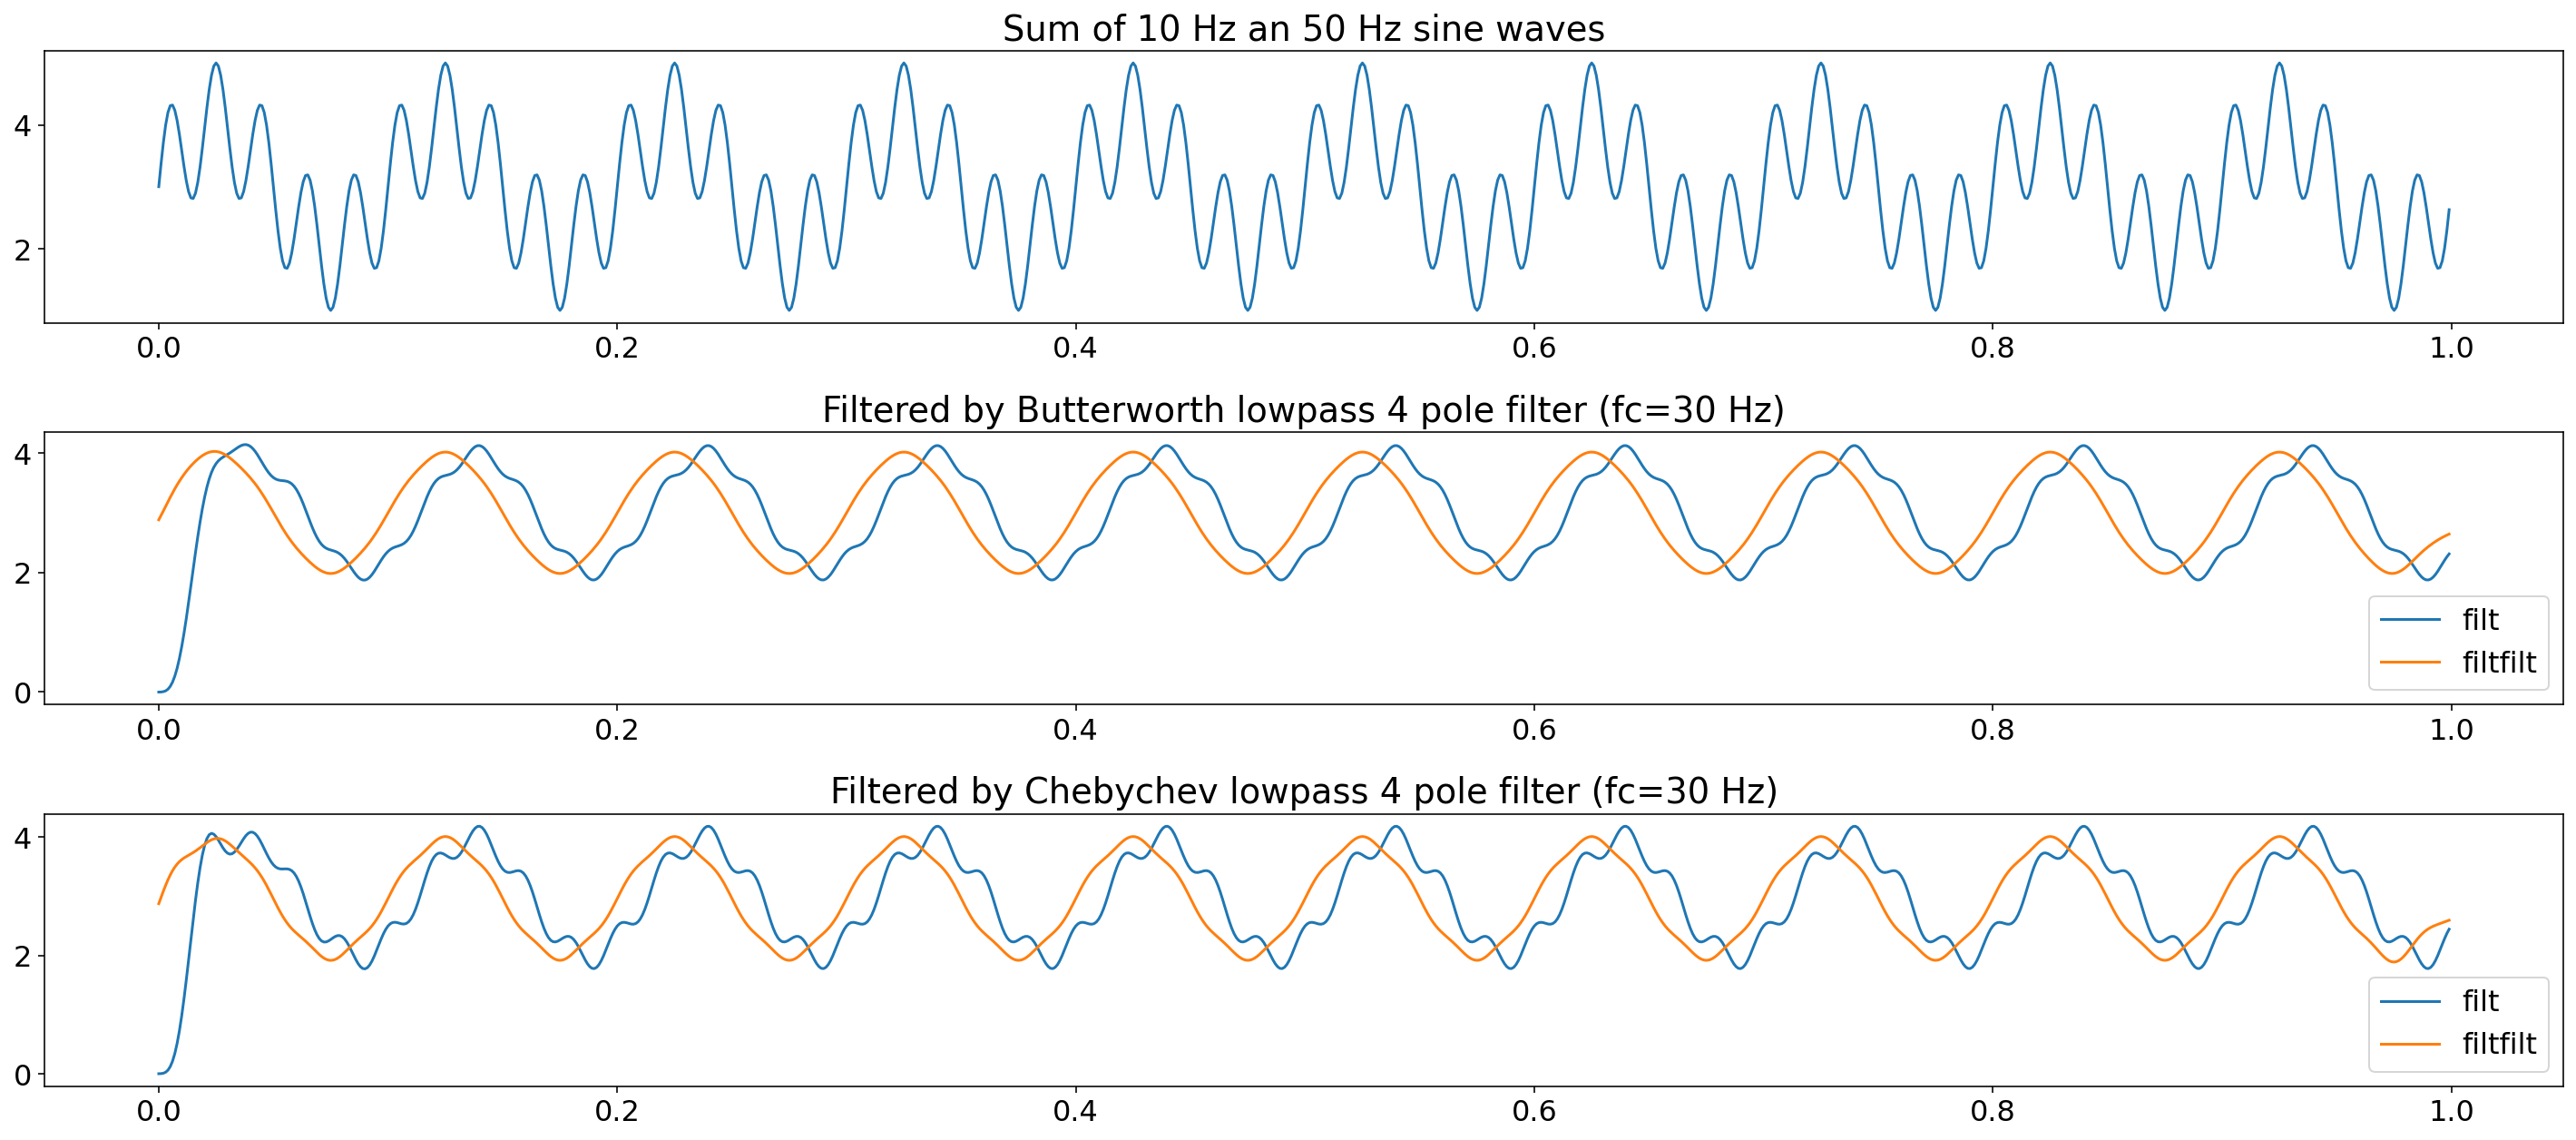

In [53]:
fs = 1000
x = np.arange(0,1,1/fs)
a1, a2 = 1, 3
f1, f2 = 10, 50
y = a1 * np.sin(x*math.pi*2*f1) + a2 + np.sin(x*math.pi*2*f2)

fig, ax = plt.subplots(figsize=(20,9), nrows=3, ncols=1)
ax[0].plot(x,y)
ax[0].set_title(f'Sum of {f1} Hz an {f2} Hz sine waves')
n, flow = 4, 30
[blow,alow] = sig.butter(n, flow/(fs/2))
ylow = sig.lfilter(blow,alow,y)
ax[1].plot(x,ylow,label='filt')
ax[1].set_title(f'Filtered by Butterworth lowpass {n} pole filter (fc={flow} Hz)')
ylow = sig.filtfilt(blow,alow,y)
ax[1].plot(x,ylow,label='filtfilt')
ax[1].set_title(f'Filtered by Butterworth lowpass {n} pole filter (fc={flow} Hz)')
ax[1].legend()

n, flow = 4, 30
[blow,alow] = sig.cheby1(n, 0.05, flow/(fs/2))
ylow = sig.lfilter(blow,alow,y)
ax[2].plot(x,ylow,label='filt')
ax[2].set_title(f'Filtered by Chebychev lowpass {n} pole filter (fc={flow} Hz)');
ylow = sig.filtfilt(blow,alow,y)
ax[2].plot(x,ylow,label='filtfilt')
ax[2].set_title(f'Filtered by Chebychev lowpass {n} pole filter (fc={flow} Hz)');
ax[2].legend()

fig.tight_layout()

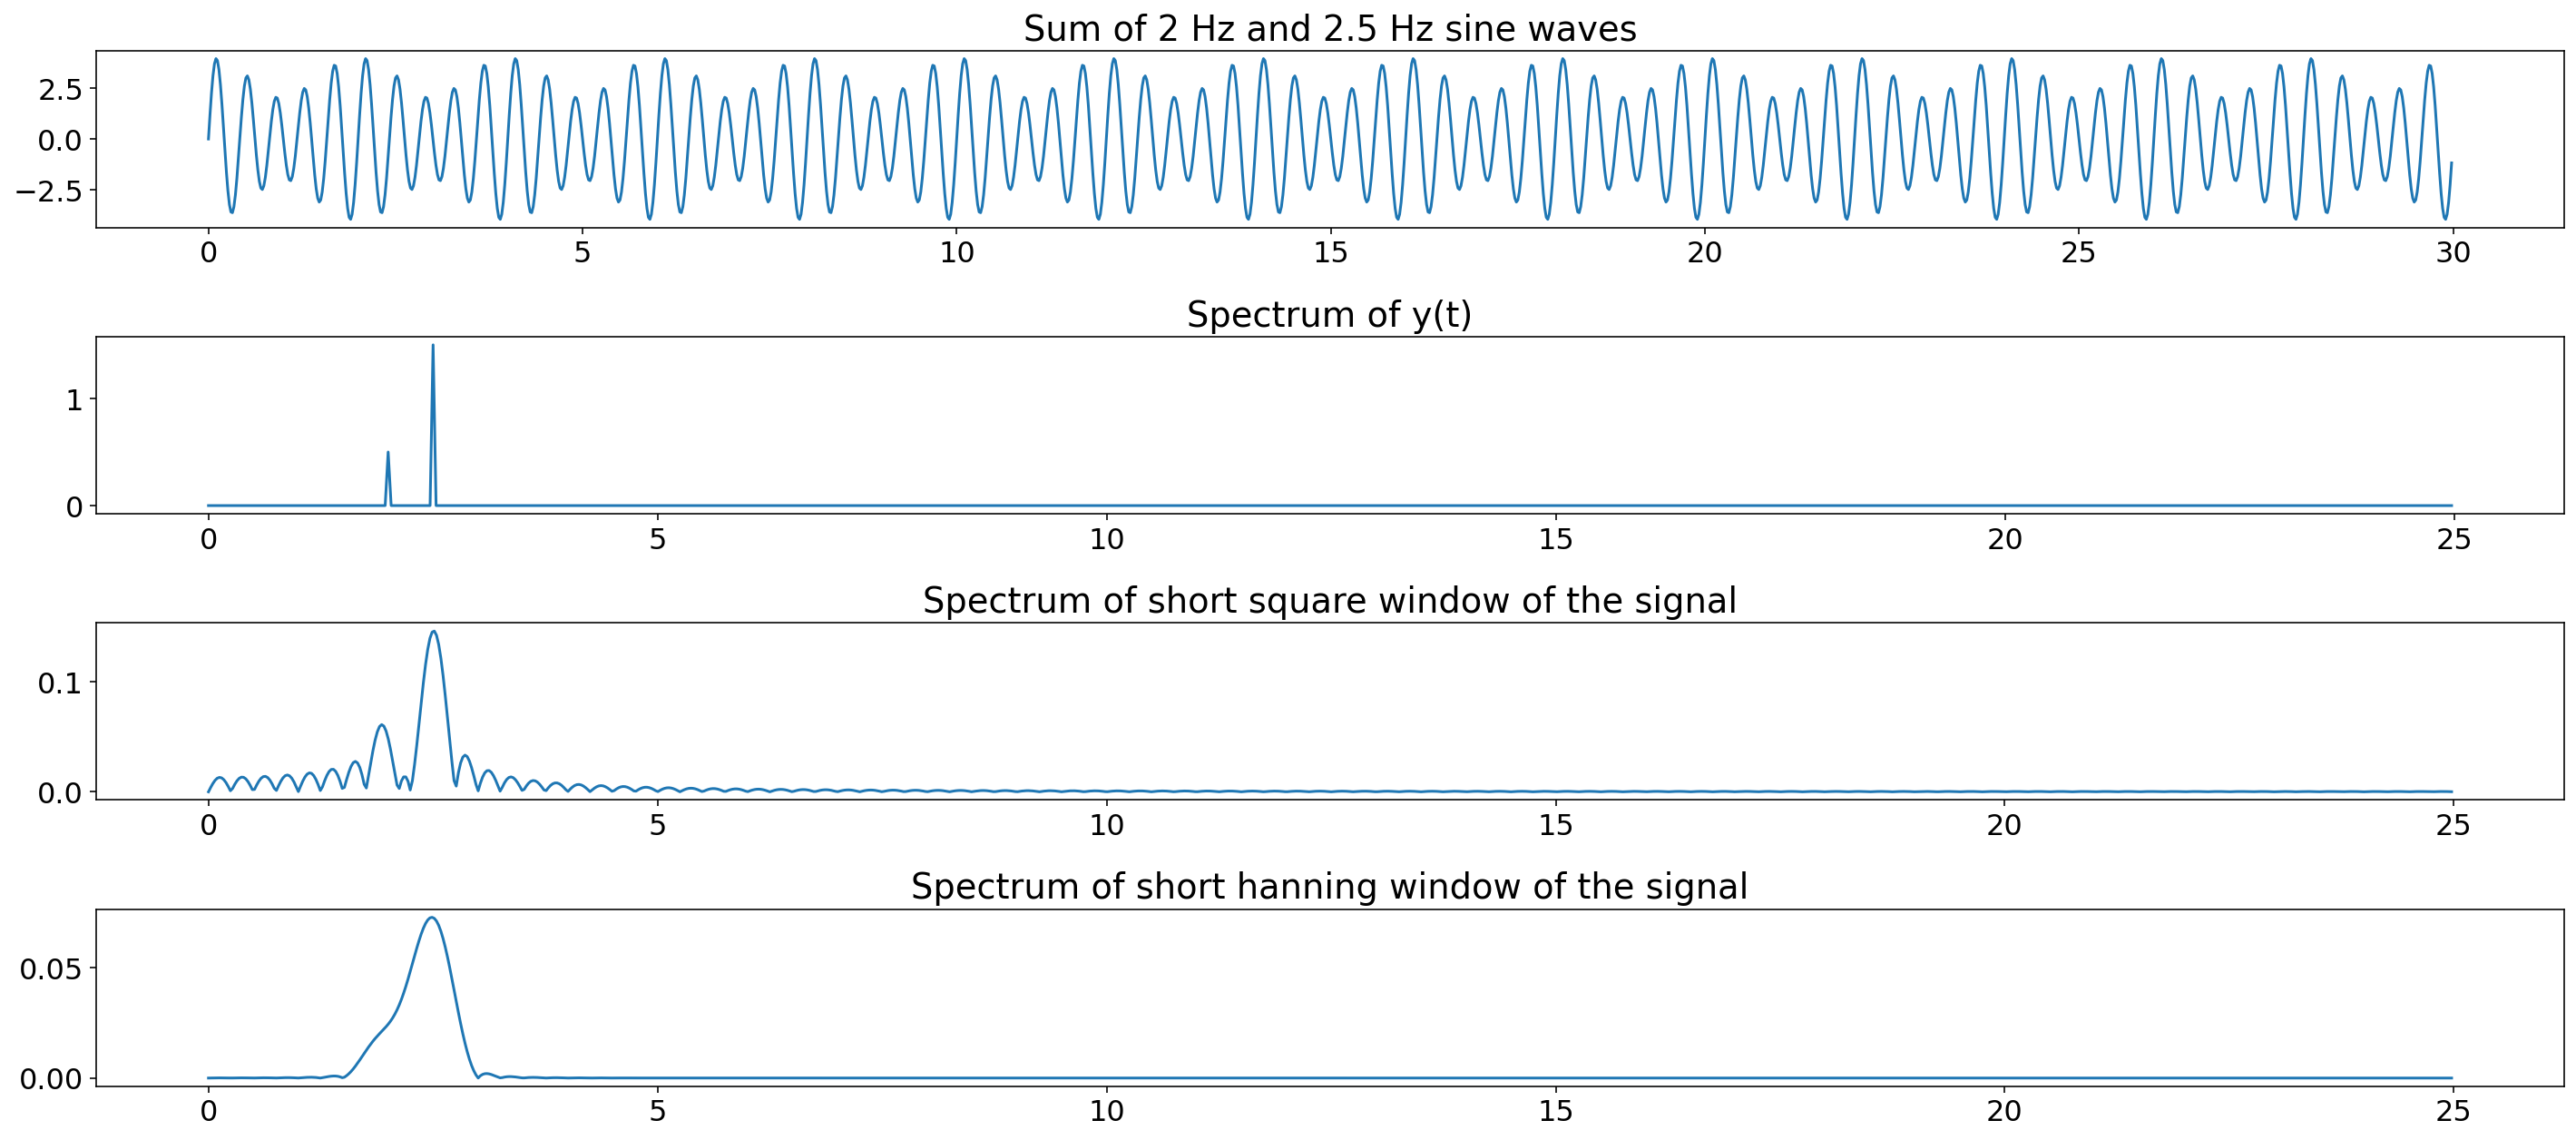

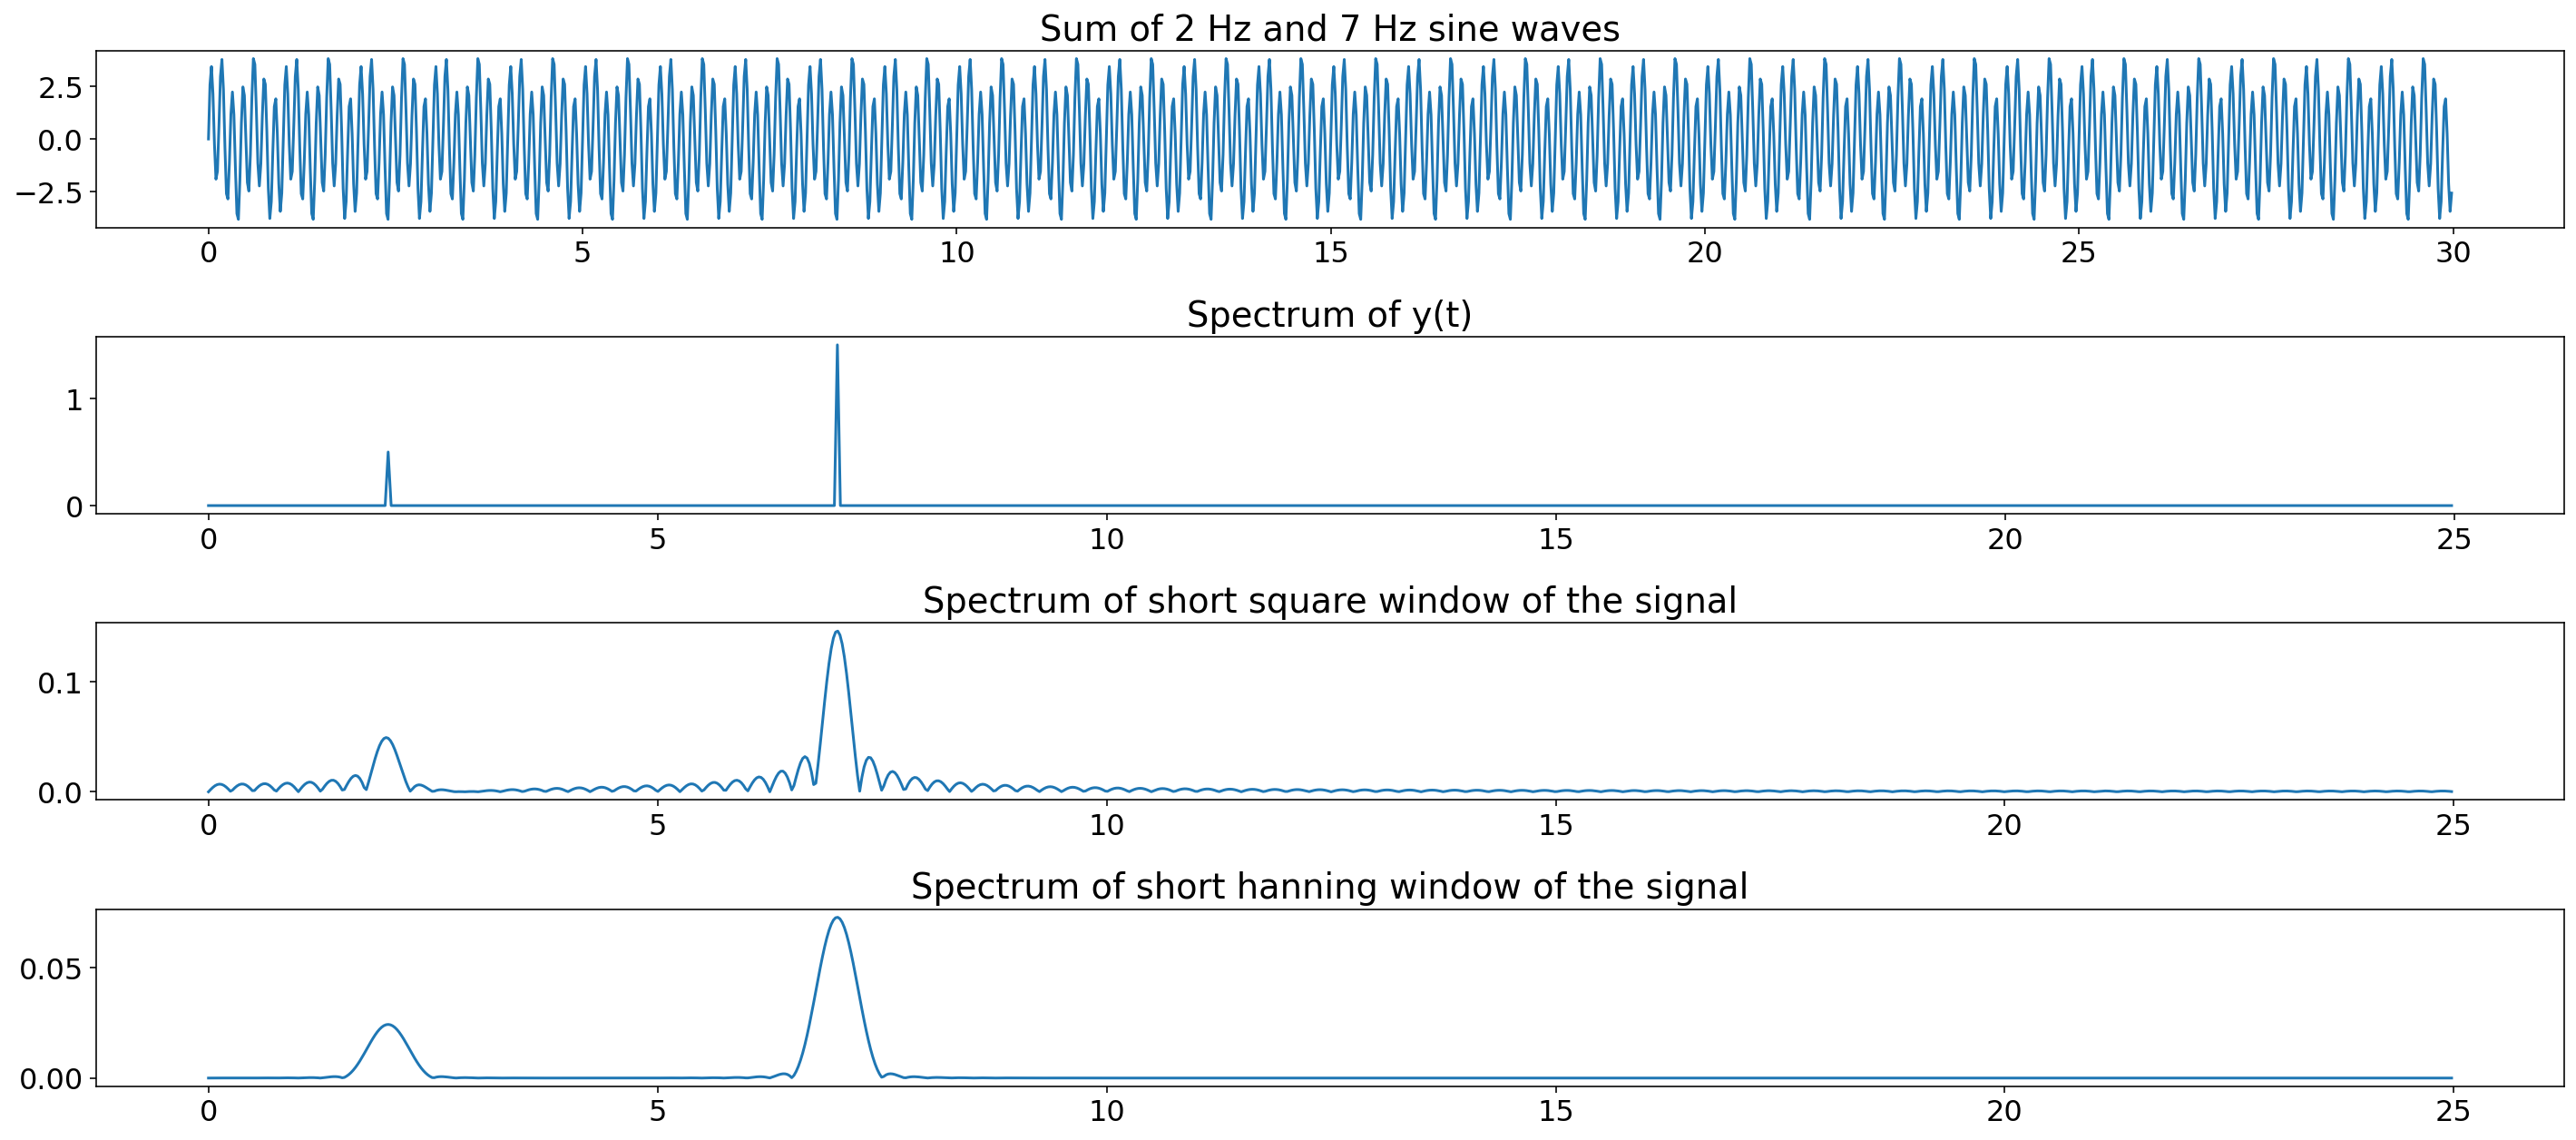

In [55]:
def twoFreqs(f, a):
    fs = 50
    x = np.arange(0,30,1/fs)
    
    y = a[0] * np.sin(x*math.pi*2*f[0]) + a[1]*np.sin(x*math.pi*2*f[1])
    nfft= 2048
    fig, ax = plt.subplots(figsize=(20,9), nrows=4, ncols=1)
    ax[0].plot(x,y)
    ax[0].set_title(f'Sum of {f[0]} Hz and {f[1]} Hz sine waves')
    # plot DFT of entire signal
    Y = np.fft.fft(y)/len(y)
    Y = abs(Y)[range(int(len(y)/2))]
    f = np.arange(len(y)/2)*(fs/len(y))
    ax[1].plot(f,Y)
    ax[1].set_title(f'Spectrum of y(t)')

    # plot DFT of shortened signal with rectangular window
    y2 = y[0:200] # take two seconds (square window)
    Y2 = np.fft.fft(y2,nfft)/nfft
    Y2 = abs(Y2)[range(int(nfft/2))]
    f2 = np.arange(nfft/2)*(fs/nfft)
    ax[2].plot(f2,Y2)
    ax[2].set_title(f'Spectrum of short square window of the signal')

    # plot DFT of shortened signal with hanning window
    y3 =y[0:200]*np.hanning(200) # take two seconds (hanning window)
    Y3 = np.fft.fft(y3,nfft)/nfft
    Y3 = abs(Y3)[range(int(nfft/2))]
    f3 = np.arange(nfft/2)*(fs/nfft)
    ax[3].plot(f3,Y3)
    ax[3].set_title(f'Spectrum of short hanning window of the signal')
    fig.tight_layout()
    return        

# Two close frequnecies
twoFreqs((2, 2.5), (1, 3)) 

# Two remote frequencies
twoFreqs((2, 7), (1, 3))   

In [58]:
!pyfdax

[   INFO] [pyfda.pyfda_rc:186] Using 'DejaVu Sans' font.
[   INFO] [pyfda.libs.tree_builder:246] Parsing config file
	'C:\Users\User\.pyfda\pyfda.conf' with sections:
		[Common]
		[Input Widgets]
		[Plot Widgets]
		[Filter Designs]
		[Fixpoint Widgets]

[   INFO] [pyfda.libs.tree_builder:297] Found 3 entries in [Common]
[   INFO] [pyfda.libs.tree_builder:322] No valid user directory specified.
[WARNING] [pyfda.libs.pyfda_lib:173] Version number of migen could not be determined.
('<' not supported between instances of 'str' and 'int')
[   INFO] [pyfda.libs.tree_builder:567] Found 5 classes in [Input Widgets]:
	pyfda.input_widgets.input_specs.Input_Specs
	pyfda.input_widgets.input_coeffs.Input_Coeffs
	pyfda.input_widgets.input_pz.Input_PZ
	pyfda.input_widgets.input_info.Input_Info
	pyfda.input_widgets.input_fixpoint_specs.Input_Fixpoint_Specs

[   INFO] [pyfda.libs.tree_builder:567] Found 6 classes in [Plot Widgets]:
	pyfda.plot_widgets.plot_hf.Plot_Hf
	pyfda.plot_widgets.plot_phi.Plot_P

KeyError: 'V_NMG'
